# On correlation

These are some notes on simple regression and correlation.

## About this page

This is a Jupyter Notebook.  It can be run as an interactive demo, or you can
read it as a web page.

You don't need to understand the code on this page, the text will tell you
what the code is doing.

You can also [run this demo
interactively](https://mybinder.org/v2/gh/matthew-brett/bio145/master?filepath=on_correlation.ipynb).

## The example problem

Let’s imagine that we have measured scores for a “psychopathy” personality
trait in 12 students. We also have some other information about these
students. For example, we measured how much sweat each student had on their
palms, and we call this a "clammy" score. We are going to use regression and
correlation to work out whether the “clammy” score predicts the “psychopathy”
score.

## Some setup

We first need to get our environment set up to run the code and plots we
need.

In [1]:
# Code to get set up.  If you are running interactively, you can execute
# this cell by pressing Shift and Enter at the same time.
# Libraries for arrays and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Import library for statistical routines
import scipy.stats as sps
# Print array numbers to 4 digits of precisiono
np.set_printoptions(precision=4, suppress=True)

## Starting with a line

Here are our scores of “psychopathy” from the 12 students:

In [2]:
psychopathy = np.array([11.416,   4.514,  12.204,  14.835,
                         8.416,   6.563,  17.343, 13.02,
                        15.19,  11.902,  22.721,  22.324])

These are the skin-conductance scores to get a measure of clamminess for the
handshakes of each student:

In [3]:
clammy = np.array([0.389,  0.2  ,  0.241,  0.463,
                   4.585,  1.097,  1.642,  4.972,
                   7.957,  5.585,  5.527,  6.964])

We believe that there is some relationship between `clammy` and `psychopathy`.
Plotting them together we get:

Text(0,0.5,'Psychopathy score')

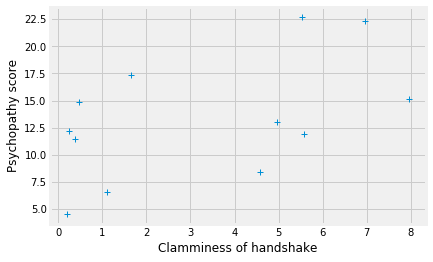

In [4]:
plt.plot(clammy, psychopathy, '+')
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')

It looks like there may be some sort of straight line relationship. We could
try to find a good line to fit the data.  Here I will do some magic to work
out a good line.

In [5]:
slope, intercept, r, p, se = sps.linregress(clammy, psychopathy)
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.4f}')

Slope: 0.9993
Intercept: 10.0713


We also got the correlation *r* value from this calculation.  Here it is, for future reference.  We will come back to this later:

In [6]:
# Correlation "r" value
print(f'Correlation r: {r:.4f}')

Correlation r: 0.5179


Here is the line drawn on the plot of the data:

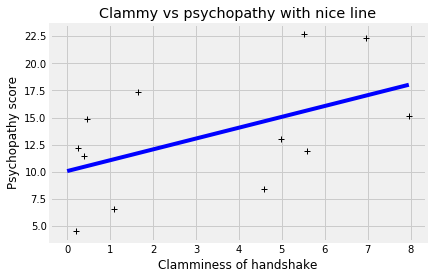

In [7]:
# Plot data with the prediction
plt.plot(clammy, psychopathy, 'k+')
mx = max(clammy)
x_vals = [0, mx]
y_vals = [intercept, intercept + slope * mx]
plt.plot(x_vals, y_vals, 'b')
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')
plt.title('Clammy vs psychopathy with nice line');

## How do we chose a good line?

The line gives a *prediction* of what `psychopathy` should be, for any value
of `clammy`.  If we have some value `x` for `clammy`, then we can predict the
value `y` of `psychopathy`, with `y = intercept + slope * x`.

For example, here are the first values for `clammy` and `psychopathy`:

In [8]:
print(f'First clammy value {clammy[0]}')
print(f'First psychopathy value {psychopathy[0]}')

First clammy value 0.389
First psychopathy value 11.416


The second value is the *actual* value of `psychopathy`.  The *predicted*
value of `psychopathy`, for this value of `clammy` is:

In [9]:
predicted = intercept + clammy[0]
predicted

10.460285848579463

The *error* for our line, is the difference between the actual and predicted
value.

In [10]:
actual = psychopathy[0]
error = actual - predicted
error

0.95571415142053695

This is the error for the first value.  We can get the errors for all the
values in the same way.

This is the calculation of error for all 12 values.  As usual, you don't need to understand the code in detail:

In [11]:
all_predicted = intercept + clammy * slope
all_errors = psychopathy - all_predicted
all_errors

array([ 0.956 , -5.7571,  1.8919,  4.3011, -6.2369, -4.6045,  5.6309,
       -2.0196, -2.8324, -3.7501,  7.1268,  5.2939])

Notice the first value for `all_errors` is the same as the value for `error`
we saw above.

The errors here are the distances between the prediction line and the points
on the plot.  Here I show the errors as red lines. Don't worry about the code
below, it's not important to the idea.

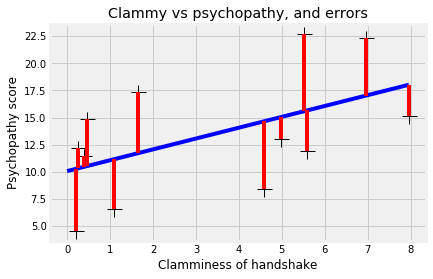

In [12]:
# Plot data with the prediction and errors
plt.plot(clammy, psychopathy, 'k+', ms=15)
mx = max(clammy)
x_vals = [0, mx]
y_vals = [intercept, intercept + slope * mx]
plt.plot(x_vals, y_vals, 'b')
# Draw the error lines
for i in range(len(clammy)):
    x_vals = [clammy[i], clammy[i]]
    y_vals = [all_predicted[i], psychopathy[i]]
    plt.plot(x_vals, y_vals, 'r')
plt.xlabel('Clamminess of handshake')
plt.ylabel('Psychopathy score')
plt.title('Clammy vs psychopathy, and errors');

A good line will make the errors as small as possible.  Therefore, a good line will make the lengths of the red lines as short as possible.

We need to generate a single number, from the errors, that gives an overall measure of
the size of the errors.

We cannot just add up the errors, because the negative and positive errors
will cancel out.  Even if the errors are a mixture of large positive and large
negative, the sum could be very small.

The usual thing to do, is to square all the errors, to make sure they are all
positive.  Then we add all the squared errors.  This gives the *sum of squared
error* or SSE.

In [13]:
# A reminder of the errors we calculated above
all_errors

array([ 0.956 , -5.7571,  1.8919,  4.3011, -6.2369, -4.6045,  5.6309,
       -2.0196, -2.8324, -3.7501,  7.1268,  5.2939])

In [14]:
# Square all the errors
squared_errors = all_errors ** 2
squared_errors

array([  0.9139,  33.1446,   3.5793,  18.4991,  38.8987,  21.2012,
        31.7074,   4.0788,   8.0224,  14.0635,  50.7916,  28.0252])

In [15]:
# Calculate the sum of the squared errors
SSE = sum(squared_errors)
SSE

252.92560644993824

The line is a good one when SSE is small.  In fact, the usual "best fit" line
chosen by packages such as Excel, is the line that gives the lowest SSE value,
of all possible lines.

It is the line that minimizes the squared error, often called the *least squares* line.

This is the line that I found by sort-of magic, above.  If you like, try other
slopes and intercepts.  You will find that they always have a higher SSE value
than the slope and intercept I have used here.

## Regression and correlation

Above, you have seen regression, using the *least squares* line.

Correlation is a version of the same thing, but where we have *standardized*
the data.

We standardize data by subtracting the mean, and dividing by the standard
deviation.

We do this, to put the x and y values onto the same scale.

For example, here is a histogram of the `clammy` values, to give you an idea
of their position and spread.

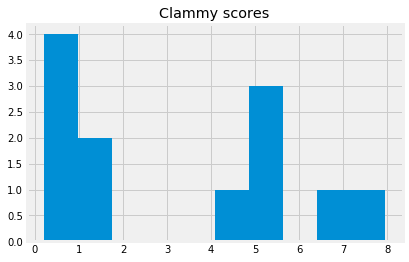

In [16]:
plt.hist(clammy)
plt.title("Clammy scores");

In correlation, we are interested to know whether the *variation* in the (e.g)
`clammy` values, predicts the variation in the (e.g)  `psychopathy` values.
Variation, is variation around the mean.  To show variation, we subtract the
mean.  We refer to the values, with the mean subtracted, as *mean centered*.

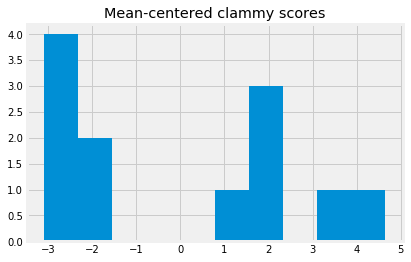

In [17]:
centered_x = clammy - clammy.mean()
plt.hist(centered_x)
plt.title('Mean-centered clammy scores');

Finally, the values for the spread either side of zero depends on the units of
the measurement.   We measure the spread, with standard deviation:

In [18]:
std_x = np.std(centered_x)
std_x

2.78136974149229

We would like to re-express our data to have a standard spread, that is
comparable for the `x` / `clammy` values and the `y` / `psychopathy` values.
For example, we might like to ensure the data have a standard deviation of 1.
To do this, we divide the centered values by the standard deviation.

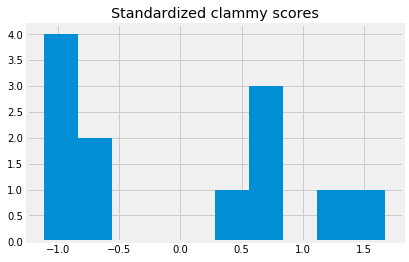

In [19]:
standard_x = centered_x / std_x
plt.hist(standard_x)
plt.title('Standardized clammy scores');

You will see below, that the mean of these values is now 0, and the standard deviation is 1.

In [20]:
print(f'Mean of standard x: {np.mean(standard_x):.4f}')
print(f'Standard deviation: {np.std(standard_x):.4f}')

Mean of standard x: 0.0000
Standard deviation: 1.0000


Our `clammy` values are now *standardized*.

We do the same for our `y` / `psychopathy` values:

In [21]:
# Standarize the y / psychopathy values
centered_y = psychopathy - psychopathy.mean()
standard_y = centered_y / np.std(centered_y)
print(f'Mean of standard y: {np.mean(standard_y):.4f}')
print(f'Standard deviation: {np.std(standard_y):.4f}')

Mean of standard y: 0.0000
Standard deviation: 1.0000


The correlation value *r* is just the slope of the regression line relating
our standardized `x` / `clammy` and standardized `y` / `psychopathy`:

In [22]:
std_slope, std_intercept, std_r, p, se = sps.linregress(standard_x, standard_y)
print(f'Standardized slope (=correlation r): {std_slope:.4f}')
print(f'Standardized intercept: {std_intercept:.4f}')

Standardized slope (=correlation r): 0.5179
Standardized intercept: 0.0000


It turns out that, when we standardize the x and y values, as we did here, the
*intercept* for the least-squares line must be zero, for mathematical reasons
that are not important for our current purpose.

Notice that the slope above is the same as the `r` value for the original
regression line:

In [23]:
print(f'Standardized slope: {std_slope:.4f}')
print(f'Original r for regression: {r:.4f}')

Standardized slope: 0.5179
Original r for regression: 0.5179


Here is the plot of standardized `clammy` against standardized `psychopathy`,
with the least-squares line:

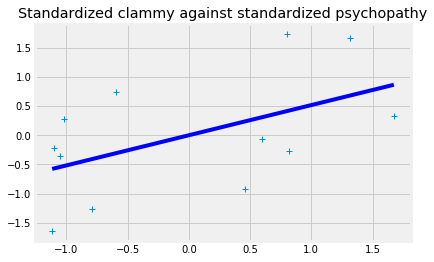

In [24]:
# Plot standard data with the prediction
plt.plot(standard_x, standard_y, '+')
mx = max(standard_x)
mn = min(standard_x)
x_vals = [mn, mx]
y_vals = [std_intercept + std_slope * mn, std_intercept + std_slope * mx]
plt.plot(x_vals, y_vals, 'b')
plt.title('Standardized clammy against standardized psychopathy');

Notice that the plot has the point (0, 0) at its center, and that the line
goes through the (0, 0) point.  The slope of the line, is the correlation
value *r*.

It turns out that, if we do this standardization procedure, the slope of the
line can only vary between 1 (where the standardized `x` values are the same as
the standardized `y` values) and -1 (where the standardized `x` values are the
exact negative of the standardized `y` values).